  Este relatório visa reportar o desenvolvimento das atividades realizadas para cumprimento do primeiro projeto da disciplina, referente ao Aprendizado Não-Supervisionado. Os algoritmos deste paradigma são capazes de aprender a encontrar padrões e classificar em subconjuntos um conjunto de dados, cujas amostras não possuem nenhum tipo de rótulo. 
  Neste notebook, avaliou-se como segundo algoritmo de Aprendizado Não-Supervisionado o DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

Este arquivo conta com dois experimentos. No primeiro, avaliou-se o comportamento do algoritmo na clusterização dos dados fornecidos pela professora, a fim de encontrar uma clusterização de dados coerente com os métodos de validação aprendidos na disciplina. Já o segundo, tratará de dados de times de basquete universitários, em temporadas de competição. Para este segundo experimento, busca-se clusterizar os times de acordo com semelhanças de técnicas esportivas e desempenho nos jogos.   

In [31]:
# IAN LORON
import numpy as np
import time
import pandas as pd 
import matplotlib.pyplot as plt
import math 
import random
import scipy.io as spio
import collections
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

Função para normalizção dos dados.

In [32]:
# IAN LORON
def normalize(data):
  normData = data.copy()
  for i in range(data.shape[1]):
    normData.iloc[:,i] /= np.linalg.norm(data.iloc[:,i])
  return normData

Função para separar dados. Utilizou-se para separar os dados na proporção 10/90.

In [33]:
# DORIVAL SILVA
def split_dataset(data, p=0.9): 
  embaralhado = data.iloc[np.random.permutation(len(data))]
  d1 = embaralhado.iloc[0:int(embaralhado.shape[0]*p),:]
  d2 = embaralhado.iloc[int(embaralhado.shape[0]*p):,:]
  return d1,d2

In [34]:
# IAN LORON
def module(i, j):
    return np.linalg.norm(i - j)
def distance_two_points (i,j):
    return math.sqrt(abs(sum(i**2-j**2)))
def distance(V):
    return math.sqrt(sum(v**2 for v in V))

A função ExpandClusters é chamada pela função DBSCAN, quando encontra-se um core point.
O algoritmo procurará pelos pontos border do core point e inseri-los no cluster. Também procura por outros pontos que sejam core-points e inseri-los na lista de core-points.

In [35]:
# IAN LORON
def ExpandClusters(data, points_labels, id_seed, neighbor_points, C, epsilon, min_pts, core_points):
    # coloca o id do cluster no ponto atual
    points_labels[id_seed] = C
   
    i = 0
    while i < len(neighbor_points):        
        next_position = neighbor_points[i]
        # se era um ponto noise, agora é um ponto border.
        if points_labels[next_position] == 0:
           points_labels[next_position] = C
        
        # se o ponto vizinho ainda nao tinha sido vizitado, o insere no cluster e avalia seu grau de adjacência.
        elif points_labels[next_position] == -1:
            points_labels[next_position] = C
            
            pn_neighbor = [i for i in range(len(data)) if np.linalg.norm(data[i,:]-data[next_position,:]) 
                           <= epsilon]
            #se o ponto tem filhos, adiciona eles na fila 
            if len(pn_neighbor) > min_pts:
                neighbor_points = neighbor_points + pn_neighbor
                core_points.append(next_position)
        i += 1
    return core_points

In [36]:
# IAN LORON
def DBSCAN(data, epsilon, minP):
  C = 0
  point_label = np.full(len(data), -1, dtype=int) 
  core_points = []
  for p in range(len(data)):
    if point_label[p] != -1: continue
    current_point = data[p]
    # armazena os pontos vizinhos ao ponto p.
    neighbor_points = [i for i in range(len(data)) if np.linalg.norm(data[i,:]-current_point) <= epsilon]
  
    # o ponto nao tem vizinhos o suficiente
    if len(neighbor_points) <= minP:
      point_label[p] = 0
    # tem vizinhos o suficiente para criar um novo clusters
    else:
      C += 1
      core_points.append(p)
      core_points = ExpandClusters(data, point_label, p, neighbor_points, C, epsilon, minP, core_points)

  return point_label, core_points, C

Abaixo, funcoes para plotar os gráficos, em duas e três dimensoes, respectivamente.

In [56]:
#Function to plot final result
def plotRes2d(train, point_labels, main_title):
  dicColors = {0:'black', 1:'yellow', 2:'purple', 3:'red', 4:'blue', 5:'green', 
              6:'orange', 7:'violet', 8:'brown'}    
  label_color = [dicColors[c%9] for c in point_labels] 
  x_label = 'x axis'
  y_label = 'y axis'
  title = main_title 
  plt.figure(figsize=(15,15))
  plt.scatter(train.iloc[:,0],train.iloc[:,1],c=label_color,alpha=0.7)
  plt.suptitle(title, fontsize=20)
  plt.suptitle(title, fontsize=20)  
  plt.suptitle(title, fontsize=20)  
  plt.savefig(title + '.png')
  plt.show()

In [ ]:
# IAN LORON
#Function to plot final result
def plotRes3d(train, point_labels, main_title):
  dicColors = {0:'black', 1:'orange', 2:'purple', 3:'red', 4:'blue', 5:'green', 
              6:'yellow', 7:'violet', 8:'brown', 9:'cyan', 10:'magenta'}    
  label_color = [dicColors[c%11] for c in point_labels] 
  x_label = 'GAMES PLAYED'
  y_label = 'GAMES WON'
  z_label = 'YEAR'
  title = main_title 

  # creating figure
  fig = plt.figure(figsize=(15,15))
  ax = plt.axes(projection ="3d")
  
  # creating plot
  ax.scatter3D(train.iloc[:,0], train.iloc[:,1], train.iloc[:,19],c=label_color,alpha=0.6)
  
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_zlabel(z_label)

  plt.suptitle(title, fontsize=20)  
  # plt.savefig(title + '.png')
  plt.show()

In [55]:
# IAN LORON
def callPlot(train_data,pointlabel, main_title, dim):
  if dim == 2:
      plotRes2d(train_data, pointlabel, main_title)
  else:
      plotRes3d(train_data, pointlabel, main_title)
  plt.show()
  counter=collections.Counter(pointlabel)
  print(counter)
  outliers  = np.count_nonzero(pointlabel == 0)
  print('number of outliers found: '+str(outliers) +'\n')

In [39]:
# IAN LORON
# encontra clusteres e centroides considerando todas as amostras. 
# utlilizado para validar os epsilons e e minpts
def find_clusters_and_centroids(norm_dataset, point_labels, n_clusters):
    clusters = [[]]*(n_clusters+1)
    for i in range(len(norm_dataset)):    
        clusters[point_labels[i]] = np.append(clusters[point_labels[i]], i)
    centroids = [[np.mean(norm_dataset[np.asarray(i).astype(int)], axis=0)] for i in clusters]
    return clusters, centroids

# encontra clusteres e centroides levando em conta apenas core points.
# usado apenas pela funcao predict - que comparará distâncias dos novos pontos com os core points.
def find_clusters_and_centroids_core (norm_dataset, core_points, point_labels, n_clusters):
    clusters = [[]]*(n_clusters+1)
    for i in core_points:    
        clusters[point_labels[i]] = np.append(clusters[point_labels[i]], i)
    centroids = [[np.mean(norm_dataset.iloc[np.asarray(i).astype(int)], axis=0)] for i in clusters]
    return clusters, centroids

'elbow' calcula o coeficiente de cotovelo.

In [40]:
# IAN LORON
def elbow (norm_data, clusters, centroids):
    centroids = np.asarray(centroids)
    elbow = 0
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            if not math.isnan(clusters[i][j]) and not math.isnan(centroids[i][0][0]):    
                # elbow: soma (ao quadrado) das distancias de p a todos pts. c pertencentes ao cluster C
                elbow += (math.dist(norm_data[np.asarray(clusters[i][j]).astype(int)], centroids[i][0]))**2
    return elbow

'silhouette' calcula o coeficiente de silhueta.

In [41]:
# IAN LORON
def silhouette (norm_data, clusters, centroids):
    sil = 0
    for i in range(len(clusters)):
        a = 0
        inf = 10000000
        for p in range(len(clusters[i])):
            if not math.isnan(centroids[i][0][0]):
                
                # a: encontra a média entre a e as distancias em relacao aos outros pts. do cluster.
                a = math.dist(norm_data[np.asarray(clusters[i][p]).astype(int)], centroids[i][0])
                b = inf

                # b: encontra a distancia do ponto ao ponto mais próximo do cluster mais próximo.
                for j in range(len(centroids)): 
                    if i != j and not math.isnan(centroids[j][0][0]):
                        # notice that len centroids equals len clusters
                        b = min(b, math.dist(norm_data[np.asarray(clusters[i][p]).astype(int)], 
                                          centroids[j][0]))
                
                # just to guarantee that sil won't tend to 1 if it has no or only one cluster
                if b == inf: 
                    b = a
                sil += (b - a)/(max(a, b)+0.000000001)
    sil /= len(norm_data)
    return sil;

'predict' é a função mais importante para a validação e testes do algoritmo. Ele calcula a distância de um ponto novo a um core-point; para todos os pontos. 

In [42]:
# IAN LORON
# input *core* clusters  
def predict(pred_dataset, norm_orig_dataset, clusters, orig_point_labels, eps):
    norm_pred_dataset = pred_dataset # normalize(pred_dataset).to_numpy()
    pred_point_labels = np.zeros(len(norm_pred_dataset),dtype=int)
    for i in range(len(norm_pred_dataset)):
        for j in range(len(clusters)):
            for cp in clusters[j]:
                cp = round(cp)
                dist = np.linalg.norm(norm_pred_dataset.iloc[i,:] - norm_orig_dataset.iloc[cp,:]) 
                
                if (dist  <= eps):
                    pred_point_labels[i] = orig_point_labels[cp] 
                    break  
    return pred_point_labels

'evaluate' auxilia para cálculo iterativo de coeficientes de cotovelo e silhueta, em função de epsilon e min points. Utilizado para se encontrar os melhores valores de epsilon e min points.

In [52]:
# IAN LORON

# 'dataset' has to be a DataFrame
def evaluate(dataset, epsilon, min_points, title):
  for minpts in min_points:
      somaDasSilhuetas = []
      somaDosQuadrados = []
      conjuntoEpsilons = []
      
      for eps in epsilon:
        conjuntoEpsilons.append(eps)
        norm_dataset = dataset.to_numpy()
        point_labels, core_points, n_clusters = DBSCAN(norm_dataset,eps,minpts)
        clusters, centroids = find_clusters_and_centroids(
                              norm_dataset, point_labels, n_clusters
        )
        elbow_val = elbow(norm_dataset, clusters, centroids)
        somaDosQuadrados.append(elbow_val)
        sil = silhouette(norm_dataset, clusters, centroids)
        somaDasSilhuetas.append(sil)
        print("epsilon: {}, elbow: {}, sil: {}".format(eps, elbow_val, sil))
        # callPlot(dataset, point_labels, "DBSCAN clusters for eps: "+ str(eps))

      fig, ax1 = plt.subplots()
      ax2 = ax1.twinx()

      color1 = 'tab:blue'
      color2 = 'tab:red'

      ax1.plot(epsilon, somaDosQuadrados, 'x-', color=color1)
      ax2.plot(epsilon, somaDasSilhuetas, 'x-', color=color2)

      ax1.set_xlabel('epsilon')
      ax1.set_ylabel('SSE', color = color1)
      ax2.set_ylabel('silhouette coef.', color = color2) 
      # plt.savefig(title +'.png')
      plt.show()

Abaixo, será iniciado a primeira parte do projeto para o algoritmo de DBSCAN. Serão aplicadas as técnicas de treinamento e validação do conjunto de dados fornecidos pela professora, no arquivo cluster.dat. Ao final, mostraremos o resultado dos testes.  

In [89]:
# IAN LORON
columns = ['coluna 1', 'coluna 2']
train = pd.read_csv("cluster.dat", decimal=".", sep=' ', names=columns)

In [90]:
# IAN LORON
# Split and initialize training & validation & test data separately
norm_train = normalize(train) # .to_numpy()
norm_train_np = norm_train.to_numpy()
training, test = split_dataset(norm_train)
training, validation = split_dataset(training)
norm_training_np =  training.to_numpy()
norm_validation_np = validation.to_numpy()

epsilon: 0.001, elbow: 0.3377587345090631, sil: 0.0
epsilon: 0.003, elbow: 0.06600753293364725, sil: 0.4269029940354309
epsilon: 0.006, elbow: 0.04414838469754524, sil: 0.7715934203300253
epsilon: 0.009, elbow: 0.04414838469754524, sil: 0.7715934203300253
epsilon: 0.012, elbow: 0.18899673911765077, sil: 0.6174589502475268
epsilon: 0.015, elbow: 0.18899673911765077, sil: 0.6174589502475268
epsilon: 0.018, elbow: 0.18899673911765077, sil: 0.6174589502475268


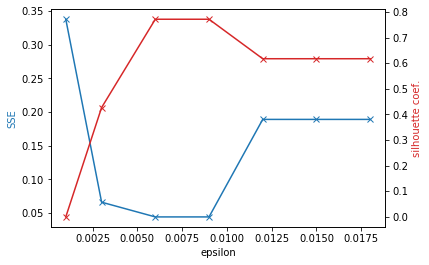

epsilon: 0.001, elbow: 0.3377587345090631, sil: 0.0
epsilon: 0.003, elbow: 0.3377587345090631, sil: 0.0
epsilon: 0.006, elbow: 0.04414838469754524, sil: 0.7715934203300253
epsilon: 0.009, elbow: 0.04414838469754524, sil: 0.7715934203300253
epsilon: 0.012, elbow: 0.18899673911765077, sil: 0.6174589502475268
epsilon: 0.015, elbow: 0.18899673911765077, sil: 0.6174589502475268
epsilon: 0.018, elbow: 0.18899673911765077, sil: 0.6174589502475268


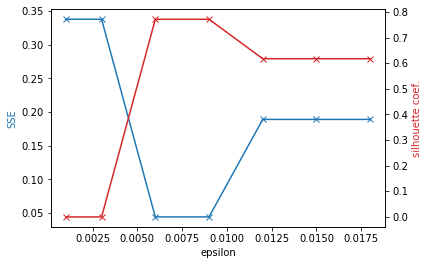

In [50]:
# IAN LORON
evaluate(training,
        [0.001, 0.003, 0.006, 0.009, 0.012, 0.015, 0.018], 
        [7, 15],
        'clusters - evaluation of best epilons and minpts')

  Como vemos pelas imagens acima, a melhor faixa de valores para epsilon de encontram entre 0.006 e 0.009, visto 
que possui o menor valor de elbow (portanto, é mais denso), e maior valor de silhueta (denso e espaçado). Como o número mínimo de pontos para formar um cluster não influenciou no resultado neste intervalo, escolheremos arbitra-
riamente minpts igual a 7.
  Agora, faremos o treinamento neste intervalo, a validação do treinamento, e o plot dos resultados de treinamento
e validação, em sequência.

In [61]:
# IAN LORON
eps = 0.006
minpts = 7
point_labels_train, core_points_train, n_clusters_train = DBSCAN(norm_training_np, eps, minpts)
clusters_train, centroids_train = find_clusters_and_centroids_core (
    training, core_points_train, point_labels_train, n_clusters_train
)

In [62]:
# IAN LORON
point_labels_valid = predict(validation, training, clusters_train, point_labels_train, eps)

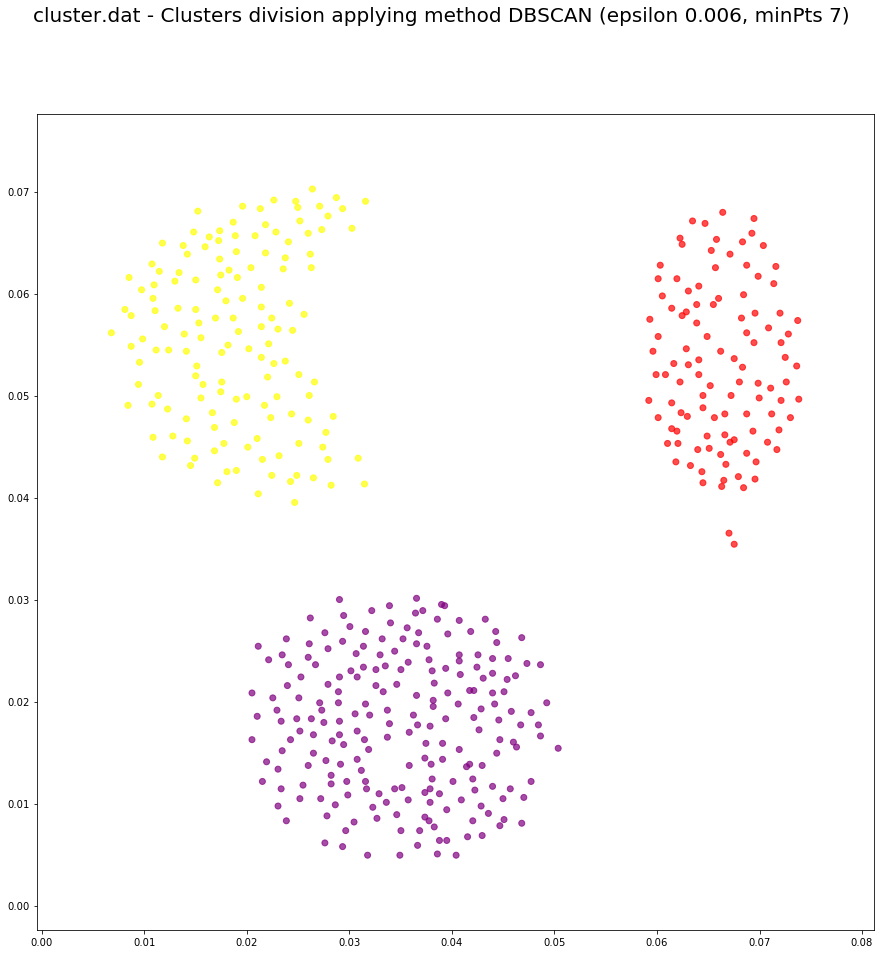

Counter({2: 214, 1: 142, 3: 107})
number of outliers found: 0



In [63]:
# IAN LORON
callPlot(training, point_labels_train,
         'cluster.dat - Clusters division applying method DBSCAN (epsilon ' +str(eps)+ ', minPts '+ str(minpts)+')',
        2)

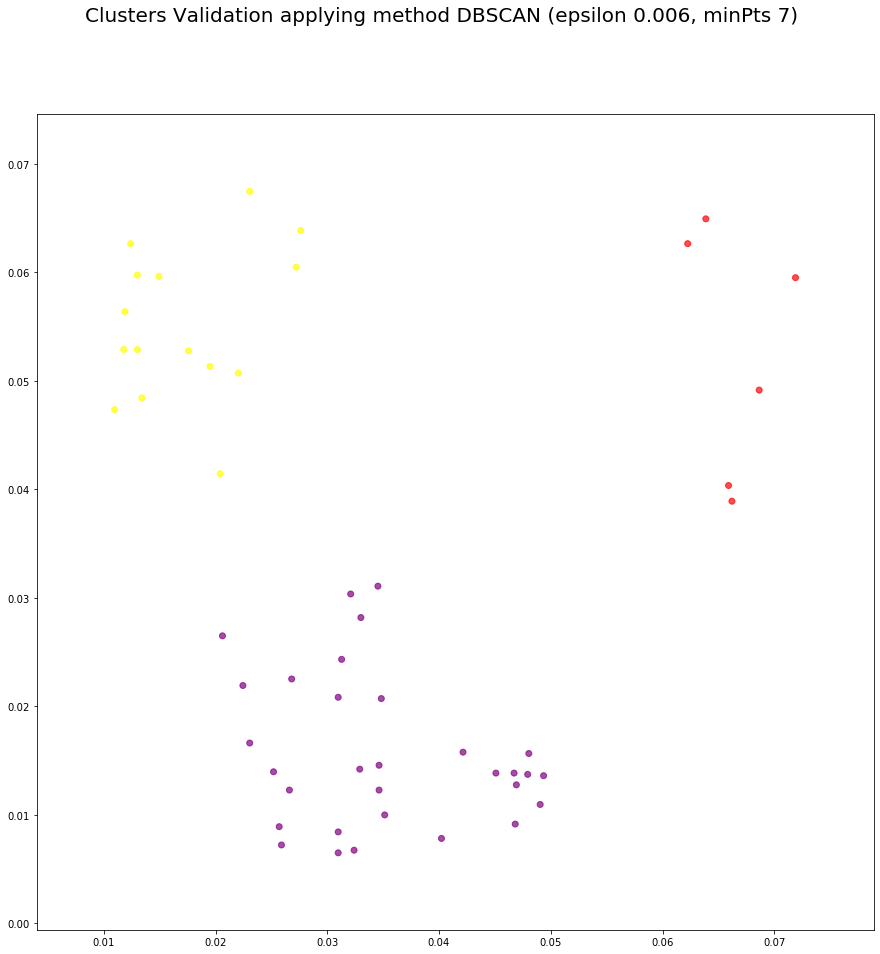

Counter({2: 31, 1: 15, 3: 6})
number of outliers found: 0



In [65]:
# IAN LORON
callPlot(validation, point_labels_valid,
         'Clusters Validation applying method DBSCAN (epsilon ' +str(eps)+ ', minPts '+  str(minpts)+')', 
         2)

Finalmente, como nossa validação foi consideravelmente coerente, aplicaremos nosso método para predizer os respectivos clusteres que as amostras de testes correspondem.

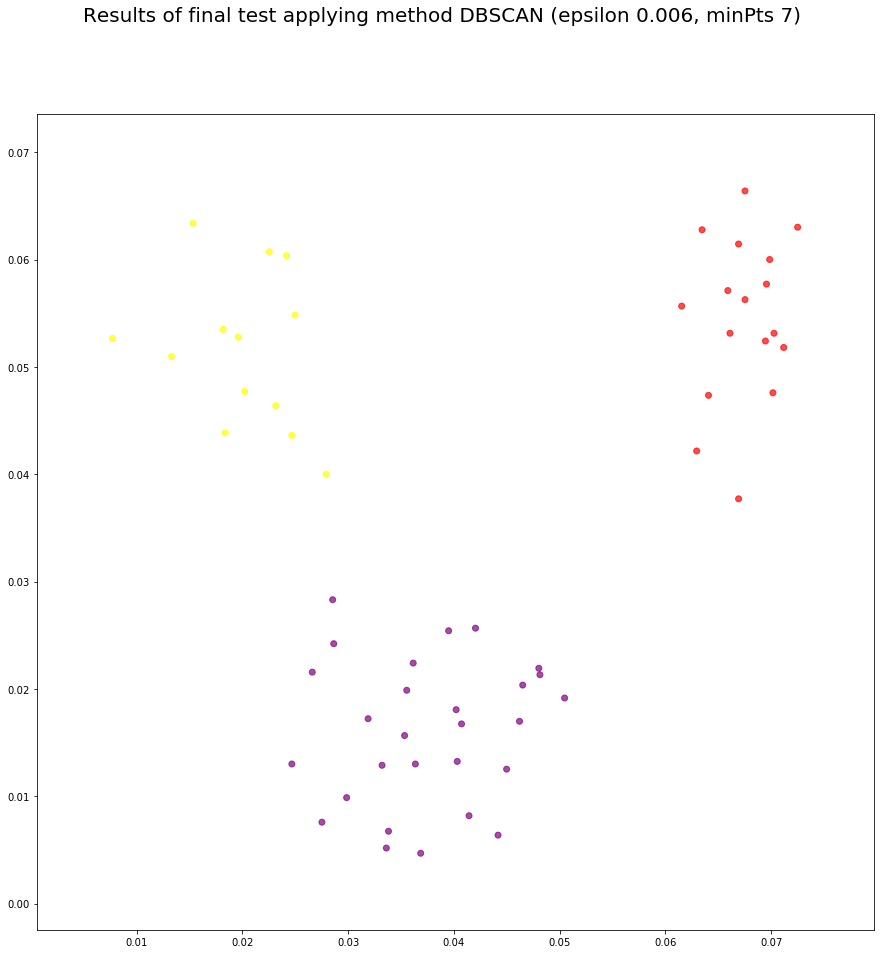

Counter({2: 28, 3: 17, 1: 13})
number of outliers found: 0



In [66]:
# IAN LORON
point_labels_test = predict(test, training, clusters_train, point_labels_train, eps)
callPlot(test, point_labels_test,
         'Results of final test applying method DBSCAN (epsilon ' +str(eps)+ ', minPts '+ str(minpts)+')', 
         2)

  Como vemos acima, o modelo previu uma solução bastante relevante para o conjunto de dados proposto.
  
  A seguir, com o intuito apenas de simular a importância da normalização dos dados no modelo, encontra-se abaixo o resultado de clusterização da técnica utilizando o parâmetro ótimo de minpts, e com valor de epsilon arbritrário, mas sem normalização. Observe que a adoção de valores escalares não é uma boa escolha, pois ao invés de compararmos a proximidade dos pontos de acordo com a distribuição dos pontos da amostra, o resultado varia principalmente devido aos valores escalares. Além disso, é mais difícil encontrar os parâmetros desejáveis sem normalização, pois o parâmetro dependeria dos dados da amostra.      

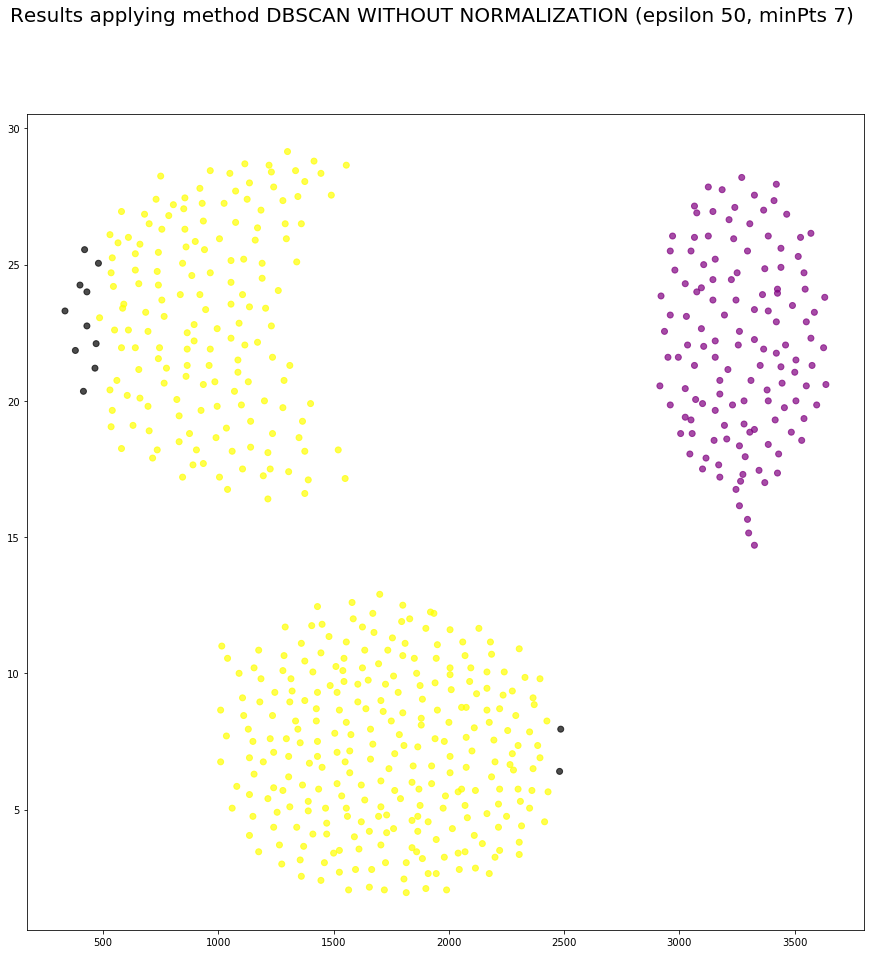

Counter({1: 431, 2: 130, 0: 12})
number of outliers found: 12



In [93]:
# Ian Loron
eps=50
minpts=7
point_labels_train, core_points_train, n_clusters_train = DBSCAN(train.to_numpy(), eps, minpts)
callPlot(train, point_labels_train,
         'Results applying method DBSCAN WITHOUT NORMALIZATION (epsilon ' +str(eps)+ ', minPts '+ str(minpts)+')', 
         2)

A seguir, será tratado o conjunto de dados do arquivo cbb.csv. Nele, há informações a respeito dos times de basquete universitários dos Estados Unidos, nas temporadas de 2013 a 2019. Os dados acumulam informações técnicas de aproveitamento de bola, eficiência de ataque e defesa, pontuação média entre outros. O objetivo de nossa aplicação é encontrar quais times possuem características semelhantes.

Primeiramente, foram removidas algumas colunas irrelevantes ou com dados que não conseguiriam ser lidos pelos métodos.

In [94]:
# IAN LORON
train = pd.read_csv("cbb.csv")
train.drop(["TEAM", "CONF", "POSTSEASON", "SEED"], axis = 1, inplace = True)
train.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,YEAR
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2016
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2015
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2018
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2019
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2017


In [95]:
# IAN LORON
# Split and initialize training & validation & test data separately
norm_train = normalize(train) # .to_numpy()
norm_train_np = norm_train.to_numpy()
training, test = split_dataset(norm_train)
training, validation = split_dataset(training)
norm_training_np =  training.to_numpy()
norm_validation_np = validation.to_numpy()

epsilon: 0.001, elbow: 0.7645433493858462, sil: 0.0
epsilon: 0.005, elbow: 0.7059658359895528, sil: -0.3585742729674716
epsilon: 0.01, elbow: 0.7632635560280527, sil: 0.2262121076408833


/home/ianloron00/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ianloron00/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


epsilon: 0.015, elbow: 0.7645433493858462, sil: 0.0
epsilon: 0.02, elbow: 0.7645433493858462, sil: 0.0


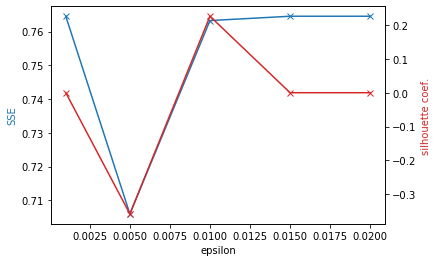

epsilon: 0.001, elbow: 0.7645433493858462, sil: 0.0
epsilon: 0.005, elbow: 0.7588734171180584, sil: -0.21067491786999926
epsilon: 0.01, elbow: 0.7633921322788659, sil: 0.21230360872560833
epsilon: 0.015, elbow: 0.7645433493858462, sil: 0.0
epsilon: 0.02, elbow: 0.7645433493858462, sil: 0.0


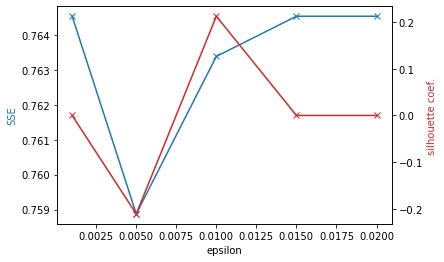

epsilon: 0.001, elbow: 0.7645433493858462, sil: 0.0
epsilon: 0.005, elbow: 0.7645433493858462, sil: 0.0
epsilon: 0.01, elbow: 0.7633921322788659, sil: 0.21230360872560833
epsilon: 0.015, elbow: 0.7645433493858462, sil: 0.0
epsilon: 0.02, elbow: 0.7645433493858462, sil: 0.0


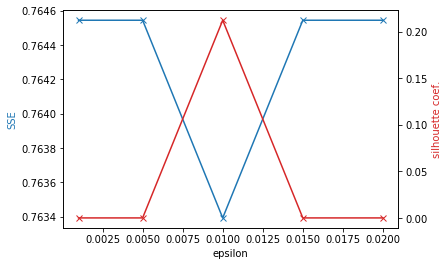

In [72]:
# IAN LORON
evaluate(training,
        [0.001, 0.005, 0.01, 0.015, 0.02], 
        [3, 7, 15],
        'cbb.csv - evaluation of best epilons and minpts - wide range')

  Pelos gráficos, o melhor valor para epsilon neste intervalo é 0.01. Apesar de a função de cotovelo ter crescido junto com a curva de silhueta, consideramos a silhueta como coeficiente mais importante neste caso, visto que coeficiente avalia tanto a densidade quanto a distância entre os clusteres. Além disso, a faixa de valores dos coeficientes de cotovelo variam muito pouco.
  Porém, um coeficiente de silhueta de aproximadamente 0.22 (maior valor, para minpts igual a 3) continua sendo um valor muito pequeno. Procuraremos valores próximos deste intervalo em busca de um epsilon que tenha coeficientes melhores.
  Devido a semelhança muito grande dos resultados com relação a epsilon, independentemente de minpts, para o próximo teste utilizaremos apenas minpts igual a 3, valor que nos trouxe melhor resultado, e que provavelmente não seria muito diferente para outros minpts. Este valor também maximaria o número de clusteres formados. Se necessário, após a validação, poderia-se procurar um valor de minpts diferente. 

epsilon: 0.0085, elbow: 0.7633934411762124, sil: 0.08799616034380009
epsilon: 0.009, elbow: 0.7634209473780905, sil: 0.09795026520940792
epsilon: 0.0095, elbow: 0.7639306256568413, sil: 0.10024679946941965
epsilon: 0.0105, elbow: 0.7627847709402703, sil: 0.31141617874095157
epsilon: 0.011, elbow: 0.7638498431262765, sil: 0.29876765922027637
epsilon: 0.0115, elbow: 0.7641983836525359, sil: 0.3497503593665442
epsilon: 0.012, elbow: 0.7645433493858462, sil: 0.0
epsilon: 0.0125, elbow: 0.7645433493858462, sil: 0.0


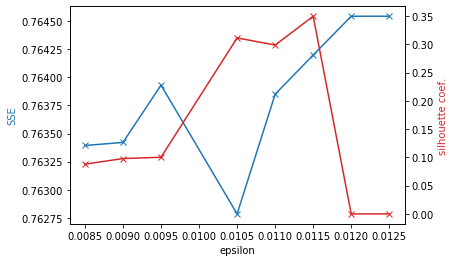

In [74]:
# IAN LORON
evaluate(training,
        [0.0085, 0.009, 0.0095, 0.0105, 0.011, 0.0115, 0.012, 0.0125], 
        [3],
        'cbb.csv - evaluation of best epilons and minpts - narrow range')

  Para este conjunto de dados, o melhor epsilon encontrado, visando maximizar ambos o menor valor de cotovelo e maior valor de silhueta, é 0.0105, para minpts igual a 3. Apesar de ainda possuir coeficiente de silhueta relativamente baixo, utilizaremos estes parâmetros para realizar o treinamento, validação e testes. 
  Note também que o gráfico também apresenta comportamento da curva de cotovelo inesperado, pois seria esperado que quanto maior o coeficiente de silhueta (maior densidade e separação entre clusteres), o coeficiente de cotovelo deveria ser suficientemente menor. No entanto, a variação é muito pequena, e o coeficiente continua com valor elevado, mesmo para o melhor valor de epsilon.  
  Com esses valores, seria preferível utilizar outra técnica, que se adequasse melhor aos dados do problema. Dito isto, por finalidades acadêmicas, será dada continuidade aos testes.

  Abaixo, treinou-se o conjunto de dados para os parâmetros escolhidos, fez-se a validação com relação aos dados do treinamento, e plotou-se os resultados.  

In [97]:
# IAN LORON
eps = 0.0105
minpts = 3
point_labels_train, core_points_train, n_clusters_train = DBSCAN(norm_training_np, eps, minpts)

In [98]:
# IAN LORON
clusters_train, centroids_train = find_clusters_and_centroids_core (
    training, core_points_train, point_labels_train, n_clusters_train
)

In [77]:
# IAN LORON
point_labels_valid = predict(validation, training, clusters_train, point_labels_train, eps)

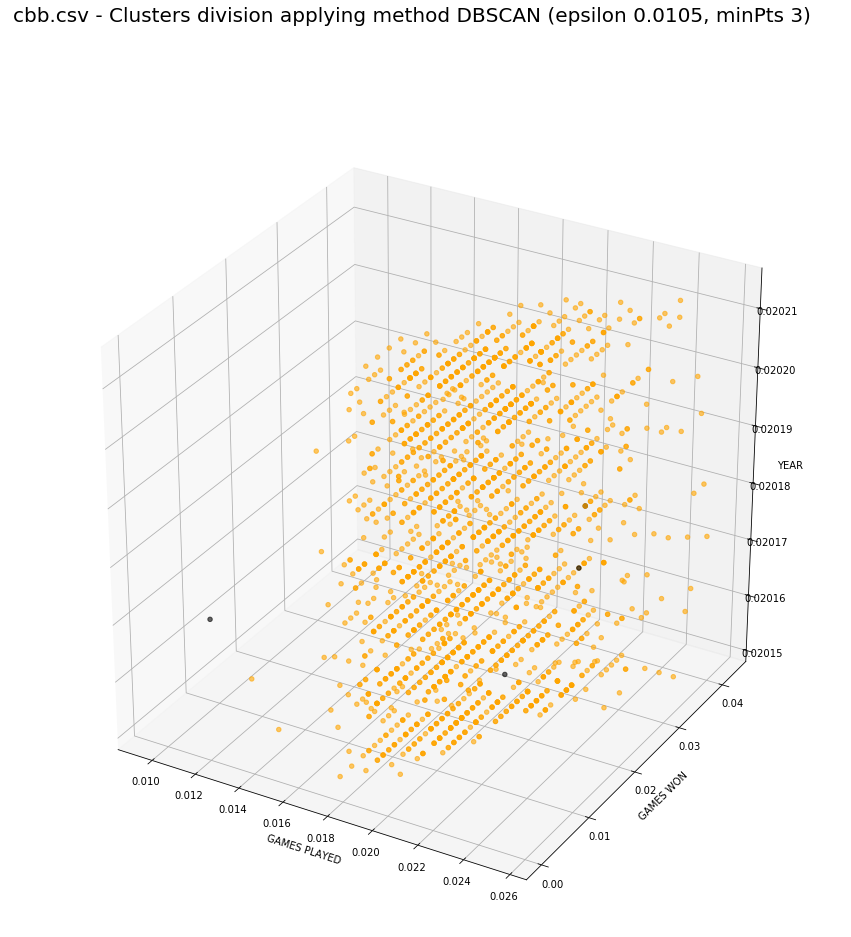

Counter({1: 1984, 0: 4})
number of outliers found: 4



In [82]:
# IAN LORON
callPlot(training, point_labels_train,
        'cbb.csv - Clusters division applying method DBSCAN (epsilon ' +str(eps)+ ', minPts '+  str(minpts) +')',
        3)

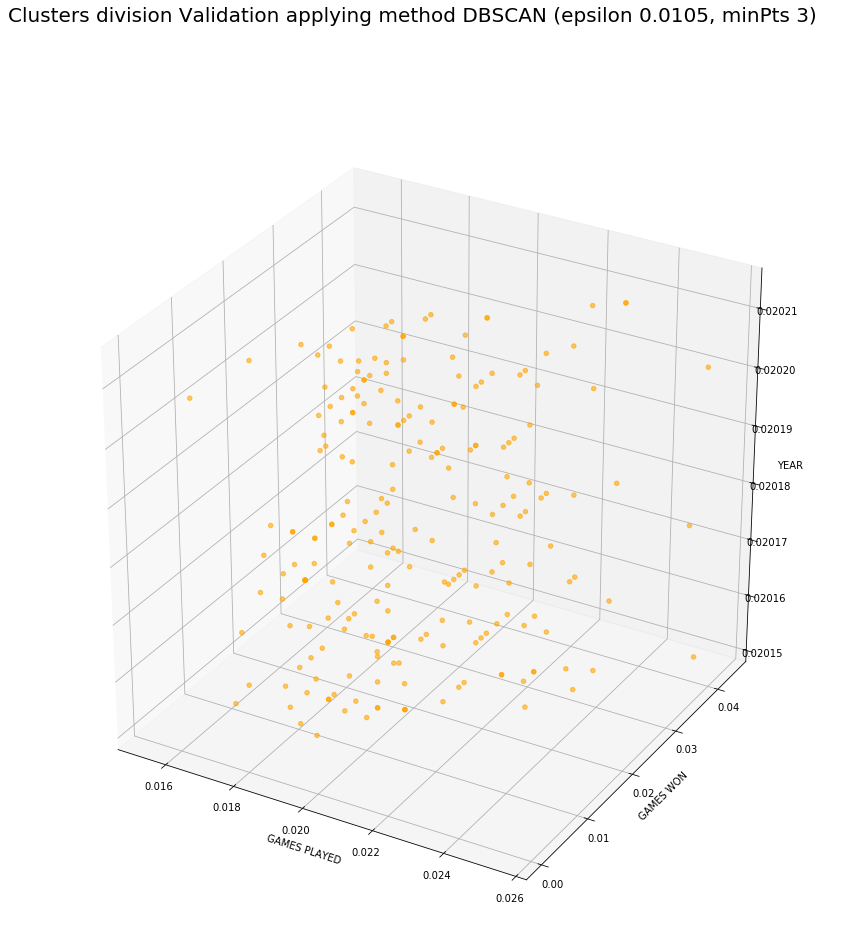

Counter({1: 221})
number of outliers found: 0



In [83]:
# IAN LORON
callPlot(validation, point_labels_valid,
         'Clusters division Validation applying method DBSCAN (epsilon ' +str(eps)+ ', minPts '+  str(minpts) +')',
        3)

  Observa-se que a melhor abordagem para o modelo foi construir um único cluster. A validação está coerente com o modelo. Porém, como a proposta inicial do projeto é separar os times em grupos com habilidades similares, este modelo não obteve resultados relevantes para uma solução esperada. 
  Note que, para valores de epsilon inferiores a 0.01, a validação apresenta coeficientes de cotovelo altos e de silhueta muito próximos de 0, bem como para valores superiores a 0.012, o coeficiente de silhueta é nulo. 
  Ademais, o número mínimo de pontos igual a três favorece a maior formação de clustere. Aumentá-lo apenas formaria clusteres maiores, possivelmente diminuindo o número de clusteres. Como formou-se apenas um cluster, não faria sentido aumentar este parâmetro.
  Concluímos assim que, para este conjunto de dados, e utilizando esta técnica, a solução não é satisfatória, mesmo com os melhores parâmetros possíveis.
  Para finalizar, apenas por formalidade apresenta-se o resultado dos testes utilizando este modelo.

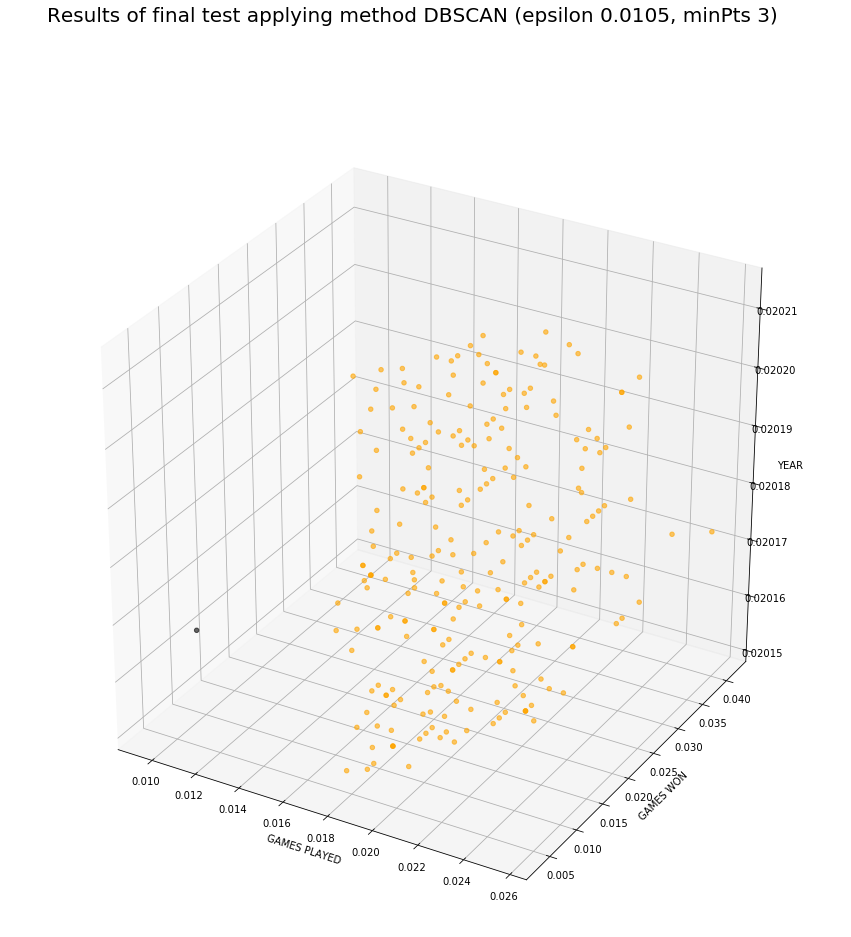

Counter({1: 245, 0: 1})
number of outliers found: 1



In [99]:
# IAN LORON
eps = 0.0105
minpts = 3
point_labels_test = predict(test, training, clusters_train, point_labels_train, eps)
callPlot(test, point_labels_test,
         'Results of final test applying method DBSCAN (epsilon ' +str(eps)+ ', minPts '+ str(minpts)+')', 
         3)